## Welcome to ***Choose Your Perfume*** ! 🌸

Welcome to ***Choose Your perfume***🌸, a Python🐍 based interface which does more than just giving great perfume recommendations. Behind this sweet scented facade actually lies detailled chemical🧪 and programming🖥️ work, carefully thought through by the creators of this project. 

The perfume industry is heavily connected to chemistry🧪, between understanding the art of blending scents according to their chemical properties and the ability to synthesis molecules according to growing consumer demand. The exponential development of synthesised molecules started no earlier than the mid 19th century, when the technological advancement, although limited, permitted the synthesis of popular and wildly used scents such as vanillin, coumarin, aliphatic aldehydes and hydroxycitronellal⚗️. Later technological discoveries allowed the synthesis of more complex odors like oakmoss, vetiver and patchouli. Nowadays, our limitations have been significantly decreased and the extent of synthesised aroma is endless, as can be noticed in our ***Choose Your Perfume***🌸 app.

Although detailling the chemical process behind the synthesis of scents and blending of fragrances is not the goal⚽ of our app, we are able to offer the users of ***Choose Your Perfume***🌸 a chemical insight on their favoured scents by providing the structures of the chosen scents and the tanimoto coefficient, which gives an indication of the structural similarities between molecules. Inside the project itself, an even deeper chemical analysis can be found, including a distribution of the structures of the molecules according to their most common scents and a graph📊 plotting the chemical similarities bewteen molecules of a same category. 

To achieve all that is mentionned above, an abundance of functions were created, each with a unique purpose that is executed in the clearest and most succinct way. The goal⚽ of this Jupyter Notebook is therefore to provide a detailled explanation of the main functions created as well as an explanation of the chemical🧪 results obtained thanks to these functions. 

## 1. INITIALISATION💻

💡**About this notebook**: A Jupyter Notebook is a shareable document that combines computer code, plain descriptive language, data, 3D models, graphs and more. It provides an interactive environment where code can be explained and data can be explored and visualised. This particular Jupyter notebook will walk you through the development of our project, with snippets of code to help you understand the principal functions of our app and project, as well as visual tools to illustrate the explanations and results.

❓**How to use this notebook**: It's not hard! Just navigate through the different cells, read the explanations provided and run the codes. Explore the different results obtained with diverse entries and experiment with the code!

🚦The first step is to import all the dependencies and functions which will ensure that the code runs well here in this notebook. All that is needed is to run the following cell!

In [71]:
import os
import sys
from IPython.display import Image, display

current_dir = os.getcwd()
project_src = os.path.abspath(os.path.join(current_dir, "..", "src", "chooseyourperfume"))
if project_src not in sys.path:
    sys.path.append(project_src)

💡***To clarify*** : let's go over each line of this cell:

*import os*: os (operating system) is a standard python module which is essential to import in this notebook. It is necessary for interacting with the operating system, like for example working with the file paths.

*import sys*: sys (system) is also a standard python module which is necessary for this jupyter notebook. It allows the manipulation of the python environment like the import path (sys.path).

*from IPython.display*: this imports tools specifically meant for displaying rich outputs inside Jupyter notebooks.

*current_dir*: it simply gets the folder where the script is running (the current working directory). It is the path of, in this case, the running notebook.

*project_src*: this is a really important line, as it builds the absolute path to the python source code. This means, it moves one folder up with '..', to get out of folder 'notebook' and than goes into the 'src' folder, and then into 'chooseyourperfume'. This allows the import of the functions created for the project directly into the Jupyter Notebook.

*if ... not in...*: in the case where the module that is to be imported in the notebook is not in the src/chooseyourperfume path, this line adds the directory to the wanted module, and makes it accessible here in the notebook.

🎉**Let's get started !**

## 2. DATASETS📰

### 2.1 Purpose🎯

💡***General note :***
Datasets are essential in the computing world. They are units which collect related sets of information and regroups them to allow their manipulation by the computer. They are often presented in a table, with each column representing a different set of information. Although they regroup different sets of informations, as mentionned, they often come from a single source and are meant for one project.

🪻***And for the perfume industry? :***
The creation of datasets plays a major role in the evolution of computing skills and technology, and the perfume industry benefits a lot from it. Even though sensory and particularly olfactory processes are still essential, datasets have helped with the modernising and enhancing of the procedures of perfume creation in several ways. Firstly, regarding perfume formulation, they allow the analysis of ingredient combination because of the understanding of the structures responsible for a certain scent provided in the datasets. Furthermore, these structures help with predicting how a molecule will smell based on its structure, which is significant for the synthesis of scents. Secondly, concerning consumer preference, datasets can identify trends based on scents and build personalised recommendation systems, similar to what is done in this project. Lastly, datasets are organised units which aid brands for marketing and categorising fragance caracter and their position in the market. Overall, it is safe to say that datasets play a crucial role in the development of this project due to its part in the perfume industry.

👩‍💻***Usage in the project :***
Specifically in this project, four datasets were used, each with its own purpose, although some were more useful than others. They are wielded to power the recommendation system as well as the chemical analysis elements of this project. As can be imagined, datasets are the base of this project. 

📝***Description of the datasets***

- final_perfume_data: this dataset contains a commercial description of the perfumes that are recommanded, including scent description and image. It's purpose in the project is to extract scent-related keywords from its description to match with the users choices inputs which then allows for the scents to be linked to the actually notes.
- fra_cleaned: it contains a user-readable description of the perfumes, and it is used in this project to add realism and natural language descriptors to the recommandations.
- fra_perfumes: this dataset is more structured, and includes information like the image or the brand of the perfumes. It is thanks to this dataset that the recommendations are displayed accompanied by their image.
- multi-labelled_smiles_odors: this dataset is probably the most important chemically, as it includes the SMILEs format of the molecules and their corresponding scents. As can be guessed, it is used here for the structure analysis of the scents.

### 2.2 Dataset example

To demonstrate the utility of datasets and how they are structured, please execute the following cell:

In [72]:
from dataset import (load_smiles_odors, load_perfume_descriptions, load_fragrantica_data, load_extended_perfume_set)

def try_load(loader_func):
    try:
        return loader_func()
    except FileNotFoundError:
        return None

df_smiles   = try_load(load_smiles_odors)
df_desc     = try_load(load_perfume_descriptions)
df_frag     = try_load(load_fragrantica_data)
df_extended = try_load(load_extended_perfume_set)

if df_smiles is not None:
    display(df_smiles.head(3))

if df_desc is not None and {'Name', 'Description'}.issubset(df_desc.columns):
    display(df_desc[['Name', 'Description']].head(3))

if df_frag is not None:
    display(df_frag.head(3))

if df_extended is not None and {'Name', 'Gender', 'Main Accords'}.issubset(df_extended.columns):
    display(df_extended[['Name', 'Gender', 'Main Accords']].head(3))

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Name,Description
0,Tihota Eau de Parfum,"Rapa Nui for sugar, Tihota is, quite simply, ..."
1,Sola Parfum,A tribute to the expanse of space extending f...
2,Kagiroi Parfum,An aromatic ode to the ancient beauty of Japa...


,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky


,Name,Gender,Main Accords
0,9am Afnanfor women,for women,"['citrus', 'musky', 'woody', 'aromatic', 'warm..."
1,9am Dive Afnanfor women and men,for women and men,"['fruity', 'woody', 'green', 'warm spicy', 'ar..."
2,9am pour Femme Afnanfor women,for women,"['fruity', 'musky', 'amber', 'citrus', 'powder..."


If the download was successful, the first three lines of the four used datasets should appear in an organised table, according to the informations provided by the unit. Here, it can clearly be seen that the structure of the datasets is what makes them necessary for facilitating the manipulation of its elements. Although only a small fragment of the datasets are represented above, this table conveys the abundance of information a single dataset offers. The function represented above does not belong to the project itself, it was fully created for this Jupyter Notebook, in the hopes of clarifying the format of a dataset and its use in the project, or in any other context.

### 2.3 Difficulties encoutered🏋️‍♀️

❓***Why?***: As downloading the datasets and making them easily usable was the base for the project, it had to be ensured that no problems would be encountered while using the datasets in the varying functions. Therefore, the python script created had to be clearly written and relatively broad, to ensure it would work for all kinds of code and functions. While attempting to find the perfect datasets and to prepare them, several challenges were faced. 
- Firstly, finding datasets which include perfume names/brands and their molecular constituants proved to be difficult, as perfume formulas are an extremely well guarded secret and also because perfumes contain many different molecules and listing them publicly is something that is rarely done. However, after a tedious search, this problem was solved and suitable datasets were found.
- Another major problem encountered was during the process of encoding the datasets. Encoding a dataset is necessary as it converts text into a specific format which a computer can store and process, usually bytes. Several encoders were tested, including UTF-8, ISO-8859-1 and cp1252. When none of the three encoders worked for all datasets, the solution found was to use UTF-8 for all the datasets, and write a function which would use ISO-8859-1 and cp1252 as back up in case UTF-8 would not work.

### 2.4 Conclusion🏁

In the code created above, it can be seen that using datasets and their informations is necessary for the development of a complex project like this one. Indeed, the vast extent of the informations needed for this app can only be retrieved from a dataset. Furthermore, finding satisfactory datasets and encoding its information were necessary steps to go through. The difficulties encountered mentionned above demonstrate that building the base of the project is not an easy task, despite the fact that it is only the foundation of the project, and does not constitute everything. 

## 3. RECOMMENDATIONS AND CHEMICAL ANALYSIS IN THE INTERFACE🌷🧪

### 3.1 Description📝

💡***General note:*** In this section, we will dive deep into the core of the project by studying and explaining the main functions. These main functions are responsible for the recommendation system, as well as the chemical structures of the scents and how they are presented.

⚗️***Chemical link:*** Chemically, the structure of the molecule has a huge impact on its properties. Indeed, even if two molecules contain exactly the same atoms in the same amounts, if their structures differ, they can have completely opposite features. Therefore, to predict the behaviour of certain molecules, it is essential to understand the nature of chemical bonds but also the arragement of the atoms within its structure. Without going in so much detail, here are two simple examples to help clarify the effect of the arrangement of atoms on the properties of a molecule.

***Examples:*** These examples involve chiral molecules. A chiral molecule is a molecule which cannot be superposed on its mirror image, like your right and left hands.

- Carvone:
    - This first example is Carvone, commonly found in essential oils. Its (R)-Carvone structure is mostly found in spearmint oil, thanks to its minty and cool smell.
    - On the other hand, its mirror image (S)-Carvone can be found in Caraway seeds, and is defined by its spicy and earthy smell.
- Thalidomide:
    - The first enantiomer, (R)-Thalidomide, is a sedative and helps with morning sickness, one of the symptoms of being pregnant.
    - Its mirror image however, (S)-Thalidomide, is extremely toxic and causes birth defect.

As can be observed, a simple structure difference such as taking the mirror image impacts grandly the effect of the molecule, even though they have the same chemical formulas. In the context of smell, the receptors present in the nose are actually made of proteins which are chiral. Therefore, chiral molecules interact with chiral systems in specific ways. It can nevertheless be observed in the examples that the enantiomers are still similar  in certain aspects, such as being related to pregnancy, or being classic essential oil scents.

***And in the Choose your perfume***🌸 ***app?:*** Keeping this example in mind, there are also examples of the same molecule with the same structure being responsible for several scents, which is what can be observed in the chemical analysis included in the interface of the ***Choose Your Perfume***🌸 app.

### 3.2 Main functions🐍

📝***Description:*** the recommendation system was one of the more complex part of the interface to put together. In the snippet of code below, it can be observed that the recommendation system is a combination of several functions put together to offer recommendations based on different criterias. What happens here in this notebook is this combination of steps: 
- First, it imports already existing loading functions and scent categories from dataset.py and utility functions to process an score perfumes from logic_cyp.py.
- Then, it loads the datasets which contain all the necessary informations to display on the recommendations.
- When that is done, the column names are cleaned to avoid conflict and mismatching during certain operations.
- After that, one binary column per selected scent is added to indicate if the particular scent is present in the description.
- Next, in this notebook, a simulation of customer choices is made by adding selected_scents and weights to receive recommendations.
- Then, is score is obtained on the quality of the recommendation regarding the scents chosen and their weights.
- Finally, the recommendations arre displayed in a table with their name, brand, score and description.

The actual function which is used to display the recommendation in ***Choose Your Perfume***🌸 works similarily, with a few modifications which are as follows:
- it uses an interactive scent selection with st.multiselect to allow the customer to choose his favoured scents while knowing all of the different possibilities.
- it includes an interactive slider to select the weights of the scents.
- And, it displays the perfumes in a rich User interface with images instead of a table.

🐍***Usage example:*** run the following cell for a glimpse inside the functionning of ***Choose Your Perfume***🌸!

In [ ]:
from dataset import scent_categories
from logic_cyp import enrich_with_scent_columns, score_perfumes

perfume_to_scent_df = load_perfume_descriptions()
perfume_df = load_extended_perfume_set()

perfume_to_scent_df.columns = perfume_to_scent_df.columns.str.strip().str.lower()
perfume_df.columns = perfume_df.columns.str.strip().str.lower()

all_scent_notes = [note for notes in scent_categories.values() for note in notes]
perfume_to_scent_df = enrich_with_scent_columns(perfume_to_scent_df, all_scent_notes, text_column='description')

selected_scents = ['vanilla', 'rose', 'musk']
weights = {'vanilla': 1.5, 'rose': 1.0, 'musk': 0.7}

results = score_perfumes(selected_scents, perfume_to_scent_df, perfume_df, weights)

results[['name_x', 'brand', 'score', 'description_x']].head(2)

,name_x,brand,score,description_x
1713,Lys 41 Eau de Parfum,Le Labo,100.0,"A lavish, breathtaking, no-holds-barred big w..."
1234,Sublimes Essences Musc Perfume Oil,Ex Nihilo,100.0,Les Sublimes Essences: a duo of exquisite per...


📝***Description:*** This next displayed function clarifies how the pictures of the recommended perfumes are found and exhibited:
- First, thanks to results.head(2), it selects the two perfume recommendations obtained above.
- Then, it finds the image URL of the perfume and makes a web request to download the image.
- It then displays the image of the perfume.

The actual function, which can be found in logic_cyp and app_perfume, functions the folloing way:
- The function score_perfumes provides the varying recommendations for which the images need to correspond.
- After that, Streamlit uses the next line: left.image(image_url.strip(), width=70) to display the perfume image next to the description and brand.
- Otherwise, the functionning of this function is the same as the code below.

🐍***Usage example:*** Run the cell below to find out what your previous recommendations look like! (⚠️ Do not judge on appearance!)

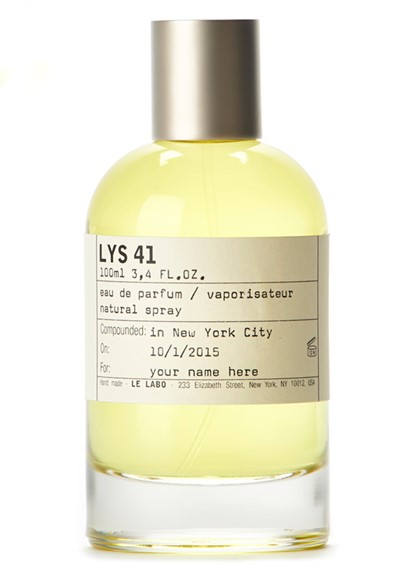

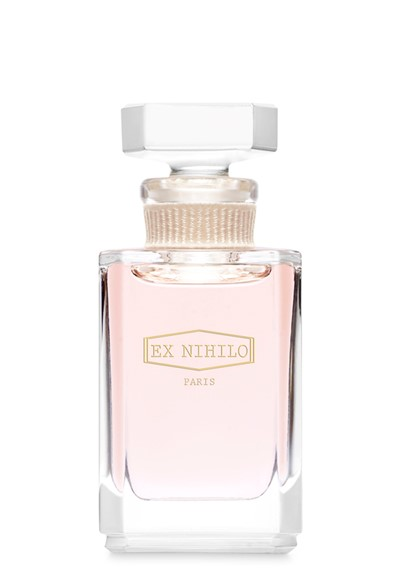

In [69]:
for _, row in results.head(2).iterrows():
    img_url = row.get('image url_x') or row.get('image url') or row.get('image_url_x') or row.get('image_url')
    
    if isinstance(img_url, str) and img_url.strip():
        try:
            response = requests.get(img_url.strip())
            img_bytes = response.content
            display(Image(data=img_bytes))
        except:
            pass

📝***Description:*** Now for a little bit of chemistry, here is an explanation of what the code below does and how it does it! its purpose is to display the molecules of the selected scents!
- Firstly, it loads the dataset from the CSV using load_smiles_odor() from dataset.py. This dataset includes the SMILEs  and their corresponding scents.
- Then, the column names are standardised, similarly to what was done two codes above.
- After that, the molecules are filtered to match the selected scents only, and uses get_molecules_from_scents() from logic_cyp.py to do so.
- Finally, it displays 3 molecule structures for each scent using the render_molecule() from RDKit’s and IPython.display imported at the beginning.

Correspondingly in the python script, the function works in the exact same way, but with also:
- an encoder, bas64, to render the molecules in the user interface
- a display which allows the customer to display all the molecules and not just the first three
- and the tanimoto similarity, a coefficient which indicates the similarity between two chemical structures represented by molecular fingerprints.

🐍***Usage example:*** Run the following code to discover which molecules are responsible for the scents selected a few codes above!


Molecules for scent: 'vanilla'


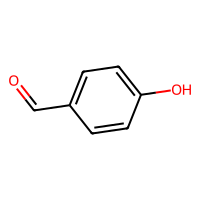

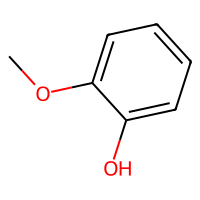

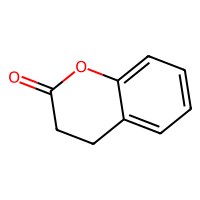


Molecules for scent: 'rose'


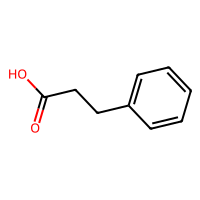

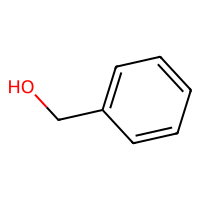

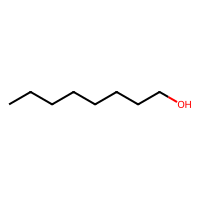


Molecules for scent: 'musk'


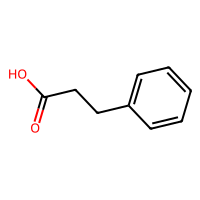

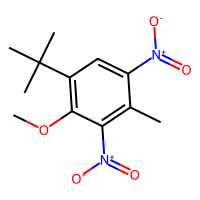

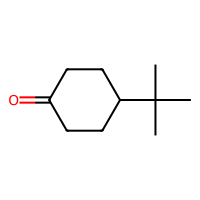

In [70]:
from logic_cyp import get_molecules_for_scents, render_molecule

df_smiles = load_smiles_odors()
df_smiles.columns = df_smiles.columns.str.strip().str.lower()

df_mols = get_molecules_for_scents(selected_scents, df_smiles)

for scent in selected_scents:
    print(f"\nMolecules for scent: '{scent}'")
    if scent in df_mols.columns:
        smiles_list = df_mols[df_mols[scent] == 1]['nonstereosmiles'].dropna().unique()[:3]
        for smi in smiles_list:
            display(render_molecule(smi))

🔎***Observations:*** As was mentionned above, in chemistry, it can be found that nearly identical molecules, like mirror images of the same molecule, can be responsible for different scents. What is equally as interesting in chemistry, and can be observed here in this jupyter notebook with the scents "Rose" and "Musk", is that a single molecule can also represent two very different scents! To explain this controversy, it is important to know that most of the time, a single molecule is not responsible for a single scent. Most scents are actually a result of the blending of molecules with different properties, which explains why a scent is represented by many molecules, although this notebook only offers you three structures per scent. Scent perception is not a linear process, the nose simply cannot associate one molecule to one scent. Here's a little bit of anatomy: the nose detects scent through receptor binding, this means that receptors change shape when perceiving odor molecules, sending signals to the odor-pocessing parts of the brain. Knowing this, it is important to note that a single molecule can actually trigger different receptors, some of which can be common to unalike scents. Therefore, it is a combination of molecules which will trigger a variety of receptors that will allow the brain to identify a specific scent!

### 3.3 Challenges faced🏋️‍♀️

Not unlike all the different parts of this project, a lot of difficulties were encountered, although each of these problems had a solution which the creators were able to find. As this part was the most visual of the project, it was important that each function completed its purpose perfectly without interfering with other functions. Therefore, the polishing of the corresponding python script was necessary and was a demaning process. Here are the few challenges encountered:
- The first main challenge encountered is that the app was initially created using gradio, a python framework used to build interactive web applications. However, since this proved to be too difficult to understand, it was recommended to use streamlit, which was therefore implemented.
- Another common problem faced was with the different paths: At some point, python had trouble recognising src as a package, so the modules within coudln't be imported. This problem was fixed by adding the full path to the 'src' folder using 'sys.path.append()'. At another poinr, python had trouble recognising the name of certain files because they had wrong relative paths. This was fixed with 'os.path.join'.
- The next problem faced was when the error displayed was 'KeyError; 'Odor''. This means that the code tried to access a column called 'Odor' which doesn't exist in the dataset. This was fixed by rewriting the function to check for the existence of each selected scent column using 'if scent in df.columns'.
- Regarding scent selection, an initial problem was that some scents had been sorted in multiple categories, so when the customer selected twice the same scent from different categories, the weight slider for this scent was displayed twice. Therefore, set(selected_scents) was created to remove dulicates and ensure each scent weight slider was exhibited only once.


### 3.4 Conclusion🏁

To conclude for this part, the theory and thought process behind the codes included in this part are relatively straightforward. Their execution however demanded a lot of reasoning and problem solving. Although sometimes the results obtained with the functions were correct, The creators of this project looked for more satisfactory outcomes which led to the polishing of each function which can be observed in the different python scripts. The results of these functions include what is displayed above, which is: the selection of scent, their weight, the perfume recommendations accompanied with their image and lastly the molecules corresponding to the chosen scents. 

## 4. ANALYSIS OF SCENTS🌻🌷🪻

### 4.1 Purpose🎯

💡***General note:*** While this final part of the jupyter notebook does not cover something that is present in the app, the ***Choose Your Perfume***🌸 project goes deeper into the analysis of scent molecules. This analysis has two purposes: the first is to achieve a complex distribution of scent molecules to a single category, while the second is more to understand the chemical similarities of the different molecules in the same category.

🧪***A little bit of chemistry:*** If all previous chemical descriptions, between very similar structures corresponding to different scents and one structure relating to opposite scents, remain unclear, this part is perfect for understanding the complexity of chemistry in the olfactory environment! Here is a more detailled recap of what we have seen so far:
- Some chiral molecules have mirror images which correspond to opposite scents, which may be surprising as they have the same formulas with the same numbers of atoms. This is because the nose scent receptors are made of protein which are also chiral, meaning one receptor is only able to intercept one molecule and another can only perceive its mirror version, sending different signals to the brain.
- On the other hand, one molecule structure can be responsible for several oposite scents. This is because a specific scent is the result of the combination of several molecules each with different properties. So, one molecule can be contained in different scents because it has a chemical property common to both.

The following code and explanation will clarify why this is so, and elaborate on the role of the structure of molecules in the different existing scents.

### 4.2 Main functions🐍

📝***Description:*** In this code, a function called assign_primary_category() was imported from chem_analysis, which is the base for this part of the project. The goal of assign_primary_category() is to analyze the descriptors of a molecule, meaning to look at which scents it represents and determine its dominant scent category, based on the predefined classification system set up with scent_categories. Therefore, each molecule structure now only belongs to one category of scent (⚠️ it does not belong to one scent, as that would have eliminated too many molecules). Here is a step by step of how it does this:
- Firstly, it separates each molecule and maps each of the scents it belongs to.
- Then, since each scents are classified into categories, it counts how many times one category appears (ex: scents: rose, jasmin; categories: floral, floral; therefore, the floral category is counted twice).
- After that, the function returns the category with the highest count (and returns none in the case of a tie). That way, each molecule is assigned to a single category of scents, which then allows the analysis of the structures of the molecules in link with their main categroy.

The small portion of code included in this notebook counts how many molecules fall into each category and displays it in the form of a table.

🐍***Usage example:*** If you run the following code, the number of different molecules of each category should appear next to the name of said category.

In [67]:
from chem_analysis import assign_primary_category

df_smiles = load_smiles_odors()
df_smiles.columns = df_smiles.columns.str.strip().str.lower()

df_smiles['primary_category'] = df_smiles['descriptors'].apply(assign_primary_category)

category_counts = df_smiles['primary_category'].value_counts()
display(category_counts)

primary_category
Fruity                         923
Sweet / Gourmand               418
Vegetal / Herbal               335
Floral                         255
Dry / Bitter / Neutral         226
Sulfurous / Allium-like        203
Spicy / Aromatic               198
Woody / Resinous               165
Animalic / Meaty               117
Smoky / Roasted / Burnt        106
Fresh / Volatile                70
Alcohol / Solvent               63
Chemical / Medicinal            56
Earthy / Mineral / Metallic     56
Nutty / Seed                    19
Fermented / Cheesy               7
Lactonic / Milky                 3
Name: count, dtype: int64

📝***Description:*** Taking the results obtained with the assign_primary_category() function above, this next and last function plots a t-SNE graph. A t-SNE plot is a visualization technique that reduces high-dimensional data into a lower-dimensional space, typically 2 or 3 dimensions, for easier analysis and exploration. Here, in this context, the plot visualizes high-dimensional chemical fingerprint data projected into 2D space, with each point representing a molecule and each color representing its primary scent category. The first line, %matplotlib inline, is specific to the jupyter notebook, it allows matplotlib plots are displayed directly in the notebook. It would actually cause an error on a regular python script.

❓***What is a chemical fingerprint?*** A chemical fingerprint, in the context of analytical chemistry and cheminformatics, is a unique representation of a chemical compound. It's like a molecular barcode, using analytical results from various techniques to identify a specific substance or compare it to others. 

🐍**Usage example:** To see the complex yet colourful and appealing graph, make sure to run the following cell!

In [50]:
%matplotlib inline

Running PCA...
Running t-SNE...


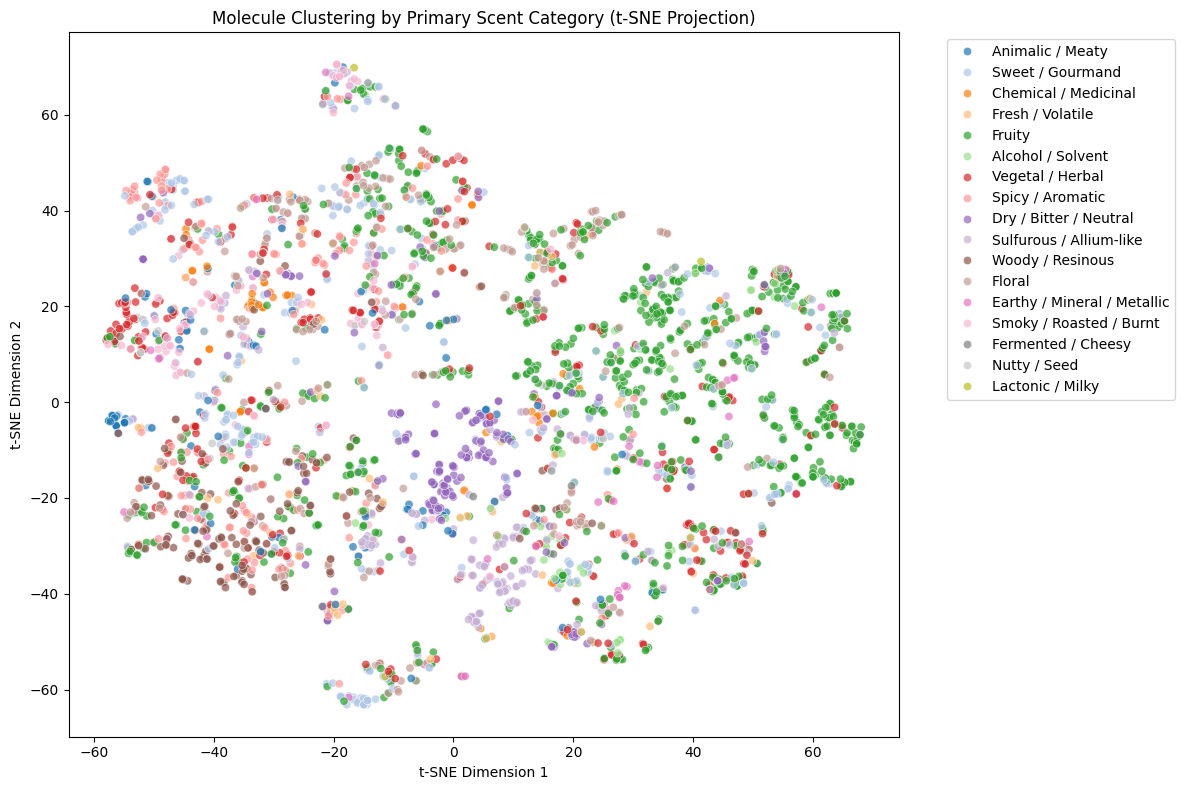

In [68]:
from chem_analysis import run_pipeline, plot_tsne

data, tsne_result = run_pipeline()
plot_tsne(data, tsne_result);

🔎**Observations:** Overall, this graph represents the similarities, structure-wise, of the different molecules analysed. If you have tried to analyse the results offered by this plot, it may be noticed that some scent categories form clusters, meaning the molecules which represent them are pretty similar, while other categories are more spread throughout the graph, meaning the molecules' structure differs greatly. The chemical deduction behind this is actually very interesting ! 4 main observations can be made:
- Some scent categories have distinct clusters: for example families like Fruity in green or Sweet/Gourmand in light-blue form clear-cut custers. What this suggests is that molecules associated with these scent profiles tend to share common substructures or functional groups, their chemical fingerprints being similar enough for them to be grouped tightly.
- Some groups of scents overlap with others, indicating chemical versatility, like for example Fruity in green, Floral in rosy-beige and Sweet/Gourmand in light blue or even Woody/Resinous in brown and Earhty/Mineral/Metallic in pink. Chemical versatility, tp clarify, refers to the capacity of a chemical element to undergo various chemical reactions, form diverse structures, and exhibit a wide range of properties, in this case, a wide range of scents. This indicates that certain molecules can trigger multiple olfactory receptors and that the same molecular scaffolds may be perceived differently depending on concentration, context, or interaction with other compounds.
- Some molecules appear to be more scatterred within the graph, like Animalic/ Meaty in blue and Sulfurous/Allium-like in light purple. This is likely because these scents can arise from a wide variety of chemically diverse compounds, as they do represent quite a wide range of scents. Furthermore, this means that their perception is strongly influenced by threshold sensitivity rather than structural similarity alone.
- Lastly, chemical simplicity and complexity can be observed. Indeed, overall, some categroies are more compact structures, which suggests greater chemical homogeneity, whereas some groups are more diffuse clusters, which could indicate several things: Broader structural diversity within that category or/and a wider olfactory tuning to different molecular shapes.

### 4.3 Difficulties encountered🏋️‍♀️

Overall, this part of the project was achieved without having to cross many obstacles. This can be because as it was the last part of the project, the knowledge accumulated throughout the project allowed a more detailled script writing from the beginning. Additionnaly, the rest of the project may have increased the creators' attention to details, limiting the number of errors made when creating new functions. One challenge worth mentionning was encountered. Many of the functions created in this project needed to be tested. While running tests for the creation of the graph, the last line plot.show() made it so the graph would always be displayed even when running tests. This demanded a lot of energy and made running simply tests a difficult task. To solve this problem, the line `if __name__ == "__main__"` was added to the function, so that the graph would only be plotted if the code was directly run on the actual script and not if it was imported and ran for a test.


### 4.4 Conclusion🏁

To conclude, this part of the project allows to dive deep into the more profound and detailled chemical analysis behind the differents scents notably found in a variety of perfumes. By adding a few ther complex functions, this project became much more than just a recommendation system. It equally allowed for a visual representation of the analysis performed thanks to the colourful graph displayed just above. All of this was done in link to the initial purpose of the app which is to recommend perfumes, which makes this part all the more interesting.

## 5. GENERAL REMARKS☑️

### 5.1 Motivations☀️

This project was inspired by the fact that the creators of this project wished to combine programming and chemistry with a thematic that would interest them as well as any users of the app or future collaborators. Additionnaly, one of the creators, a student in chemistry at EPFL like all four of the creators, is passionate about the perfume industry and wishes to persue a career in this domain. Therefore, this project idea came naturally, and kept the students interested throughout the building process of the project.

### 5.2 Main features🐍

The main features of this project include:
- Downloading several datasets, making them usable and finding a way to make link them to be able to extract all of their informations.
- Creating an app interface using Streamlit.
- Categorising scents into categories and creating a functions which will allow for users of the app to ba able to select scents.
- Adding a slider to measure the fondness for each scent to improve the recommendations.
- Providing recommendations with the name, brand, image, description and score of the recommendation, the latter being a score of compatibility between the demand and the result.
- Giving a chemical insight on the different chosen scents by displaying their molecules and the tanimoto coefficient.
- Analysing the similarities between molecules of a same category.

### 5.3 Limitations⚠️

Although this project is very detailled and has a clear purpose which it fulfills, it has limitations. One of the main limitations that is worth mentionning is that the datasets containing the perfume choices which are used for the recommendations do not include all existing perfumes. Indeed, the dataset used is a combination of all perfumes available in Sephora, a French multinational retailer of personal care and beauty products. Although it facilitates the search for where to buy your recommended perfume, this limitation cannot be ignored. Another limitation, which is less impactful then the previous limitation, is that for the analysis of scents provided in the last part, the molecules were assigned to categories of scents, and not scents in particular. This is because if the function that sorted molecules was to categorise them according to their primary scents, some scents would have been left with zero melocules. Therefore, it was easier to categorise them according to their primary group of scents.

### 5.4 Additionnal challenges🏋️‍♀️

One of the main challenges faced during the end of the project was the test runs. Indeed, on some computers, usually macs, all tests seemed to run well and pass. However, on several, though not all, windows computers, some errors appeared, usually linked to the supposed abscence of certain dependencies, even if the environments on all computers were identical. Moreover, the test coverage of this project was very low to begin with. This problem was solved to a certain extent. Indeed, many tests were added, which all passed, and brought the coverage relatively high, although not very close to 100%. However, it is important to note that many of the functions created were related to the app interface, and therefore could not be tested. Consequently, it was simply impossible to obtain a coverage of 100%, and the one obtained represents all the testable functions included in this project.

### 5.5 Sources🌳

For the making of the notebook, the following sources were used:
- Chemistry Europe: https://chemistry-europe.onlinelibrary.wiley.com/doi/10.1002/ejoc.202300900
- Perfume playground: https://www.perfumeplayground.co/the-art-of-blending/
- Merriam-Webster dictionnary: https://www.merriam-webster.com/dictionary/dataset
- Wikipedia: https://en.wikipedia.org/wiki/Chirality_(chemistry)
- ChatGPT

### 5.6 Conclusion🏁

To conclude the whole project, ***Choose your perfume***🌸 envelops detailled programming work as well as chemical analysis in an organised and visual way. More than that, the Streamlit app created with this project is a useful tool that can be used by everyone, and is not specific to the chemistry industry. It can be affirmed that any who use this python project would found their chemical knowledge and understanding of various properties of molecules to have significanty improved, which means ***Choose Your Perfume***🌸 has achieved its goals !